In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [13]:
agg1=pd.read_csv('lyy.csv')

In [14]:
agg1.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017/11/26 9:47,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,2082.823000,0,0,fuckeddup,661.491,100001,50
1,2017/11/26 9:47,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,1118.815000,0,0,nojiongegg,741.359,100002,47
2,2017/11/26 9:47,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,25.533026,73,0,Darthmoca,83.255,100006,97
3,2017/11/26 9:47,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,997.51000,1032.667850,345,3,gk1715,1144.816,100007,30
4,2017/11/26 9:47,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,4296.35938,2300.323490,449,4,Angeliaboby,1112.843,100021,32


In [15]:
agg1.shape

(10000, 15)

In [8]:
agg1.drop_duplicates(inplace=True)

In [9]:
agg1.loc[1]

date                                                     2017/11/26 9:47
game_size                                                             97
match_id               2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...
match_mode                                                           tpp
party_size                                                             1
player_assists                                                         0
player_dbno                                                            0
player_dist_ride                                                       0
player_dist_walk                                                 1118.82
player_dmg                                                             0
player_kills                                                           0
player_name                                                   nojiongegg
player_survive_time                                              741.359
team_id                                            

In [20]:
agg1['won'] = agg1['team_placement'] == 1

In [21]:
agg1['drove'] = agg1['player_dist_ride'] != 0

Text(0.5, 1.0, '击杀人数与吃鸡概率的关系')

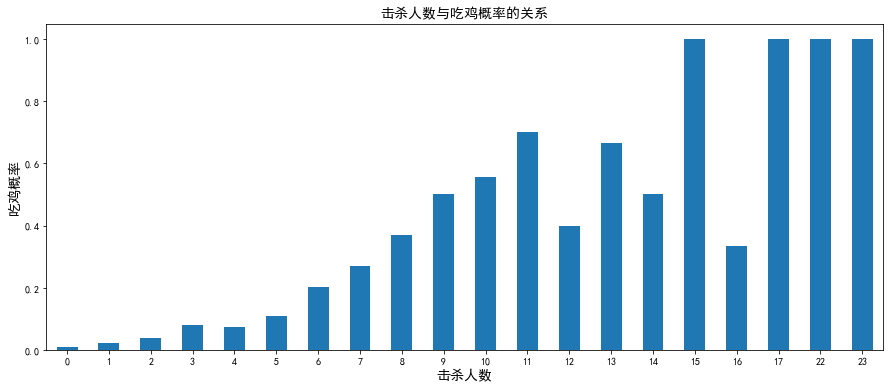

In [22]:
agg1.loc[agg1['player_kills'] < 40, ['player_kills', 'won']].groupby('player_kills').won.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('击杀人数', fontsize=14)
plt.ylabel("吃鸡概率", fontsize=14)
plt.title('击杀人数与吃鸡概率的关系', fontsize=14)

In [51]:
dmg = agg1.loc[agg1['player_dmg']<1600, ['player_dmg','won']]

In [52]:
labels=["0-200", "200-400", "400-600", "600-800","800-1000", "1000-1200", "1200-1400", "1400-1600"]
dmg['dmg_cut'] = pd.cut(dmg['player_dmg'], 8, labels=labels)

Text(0.5, 1.0, '伤害量与吃鸡概率的关系')

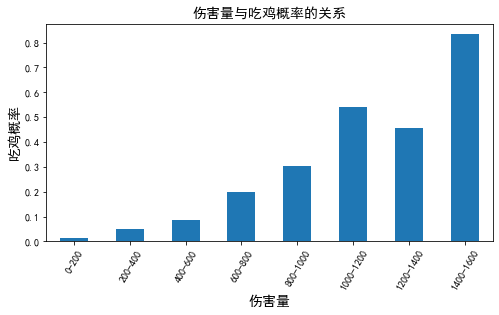

In [53]:
dmg.groupby('dmg_cut').won.mean().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("伤害量", fontsize=14)
plt.ylabel("吃鸡概率", fontsize=14)
plt.title('伤害量与吃鸡概率的关系', fontsize=14)

In [108]:
agg2 = pd.read_csv('kill.csv')

In [109]:
agg2.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,SCAR-L,854545656,1.0,366716.6,302736.6,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1059,SmileyRiley,32.0,366591.3,302851.8
1,AKM,chane_e,57.0,436041.6,276913.3,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,109,bonesaw53,85.0,434867.2,276258.3
2,Hit by Car,LY0629,42.0,265942.7,404094.2,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,624,Robi256,44.0,265409.5,403900.4
3,SKS,Supramida,6.0,339174.6,258929.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1450,Senorbotches,14.0,331995.5,253868.1
4,M416,scopionzy,3.0,289848.4,290939.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1296,lukesteeler,24.0,290196.1,291358.5


In [110]:
agg2.shape

(10000, 12)

In [111]:
agg2['dead'] = agg2['killer_placement']!=1

In [115]:
time_1 = agg2.loc[agg2['time']<=2213,['time','dead']]

In [116]:
labels=["0-4", "4-8", "8-12","12-16", "16-20", "20-24", "24-28", "28-32", "32-36", "36-40"]
time_1['time_1_cut'] = pd.cut(time_1['time'],10, labels=labels)

Text(0.5, 1.0, '时间与死亡的关系')

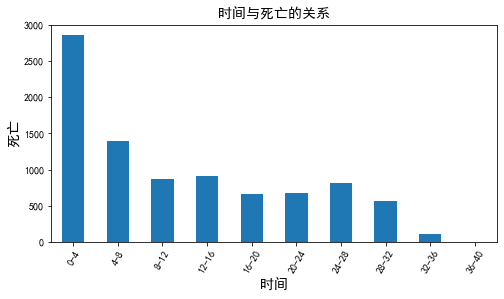

In [117]:
time_1.groupby('time_1_cut').dead.sum().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("时间", fontsize=14)
plt.ylabel("死亡", fontsize=14)
plt.title('时间与死亡的关系', fontsize=14)

In [91]:
agg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   killed_by          10000 non-null  object 
 1   killer_name        9245 non-null   object 
 2   killer_placement   9245 non-null   float64
 3   killer_position_x  9245 non-null   float64
 4   killer_position_y  9245 non-null   float64
 5   map                10000 non-null  object 
 6   match_id           10000 non-null  object 
 7   time               10000 non-null  int64  
 8   victim_name        10000 non-null  object 
 9   victim_placement   9807 non-null   float64
 10  victim_position_x  10000 non-null  float64
 11  victim_position_y  10000 non-null  float64
 12  dead               10000 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 947.4+ KB


In [92]:
agg2.info(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   killed_by          10000 non-null  object 
 1   killer_name        9245 non-null   object 
 2   killer_placement   9245 non-null   float64
 3   killer_position_x  9245 non-null   float64
 4   killer_position_y  9245 non-null   float64
 5   map                10000 non-null  object 
 6   match_id           10000 non-null  object 
 7   time               10000 non-null  int64  
 8   victim_name        10000 non-null  object 
 9   victim_placement   9807 non-null   float64
 10  victim_position_x  10000 non-null  float64
 11  victim_position_y  10000 non-null  float64
 12  dead               10000 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 947.4+ KB
